In [1]:
import sys
sys.path.append("./src/")

from scaling import Scaler
from preprocessing import *
from reindex import *
from blobs import *

import glob

/n/home10/phyllis/mambaforge/envs/rs/lib/python3.8/site-packages/scipy/__init__.py:143: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.19.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Reindexing

In [5]:
file_list = glob.glob("../PTP1B_DK/mtzs/PTP1B*mtz")
file_list.sort()

In [6]:
reindex_files(file_list, file_list[0], '../PTP1B_DK/mtzs_reindex')

100%|██████████| 1680/1680 [16:04<00:00,  1.74it/s]


['../PTP1B_DK/mtzs_reindex/PTP1B-y0002_mrflagsref_idxs.mtz',
 '../PTP1B_DK/mtzs_reindex/PTP1B-y0003_mrflagsref_idxs.mtz',
 '../PTP1B_DK/mtzs_reindex/PTP1B-y0009_mrflagsref_idxs.mtz',
 '../PTP1B_DK/mtzs_reindex/PTP1B-y0011_mrflagsref_idxs.mtz',
 '../PTP1B_DK/mtzs_reindex/PTP1B-y0017_mrflagsref_idxs.mtz',
 '../PTP1B_DK/mtzs_reindex/PTP1B-y0019_mrflagsref_idxs.mtz',
 '../PTP1B_DK/mtzs_reindex/PTP1B-y0020_mrflagsref_idxs.mtz',
 '../PTP1B_DK/mtzs_reindex/PTP1B-y0027_mrflagsref_idxs.mtz',
 '../PTP1B_DK/mtzs_reindex/PTP1B-y0028_mrflagsref_idxs.mtz',
 '../PTP1B_DK/mtzs_reindex/PTP1B-y0029_mrflagsref_idxs.mtz',
 '../PTP1B_DK/mtzs_reindex/PTP1B-y0033_mrflagsref_idxs.mtz',
 '../PTP1B_DK/mtzs_reindex/PTP1B-y0034_mrflagsref_idxs.mtz',
 '../PTP1B_DK/mtzs_reindex/PTP1B-y0035_mrflagsref_idxs.mtz',
 '../PTP1B_DK/mtzs_reindex/PTP1B-y0043_mrflagsref_idxs.mtz',
 '../PTP1B_DK/mtzs_reindex/PTP1B-y0045_mrflagsref_idxs.mtz',
 '../PTP1B_DK/mtzs_reindex/PTP1B-y0046_mrflagsref_idxs.mtz',
 '../PTP1B_DK/mtzs_reind

#### Find Intersection and Check PCA

In [24]:
file_list = glob.glob("../PTP1B_DK/mtzs_reindex/PTP1B*mtz")
file_list.sort()

In [25]:
def find_intersection(input_files, output_path):
    df_list = []
    for file in tqdm(input_files):
        try:
            df = rs.read_mtz(file)[['F-obs']]
            df = df.rename(columns={'F-obs': os.path.basename(file)})
            df_list.append(df)
        except:
            continue
    result = pd.concat(df_list, axis=1, join='inner')
    result.to_pickle(output_path)

In [26]:
find_intersection(file_list, '../PTP1B_DK/mtzs_reindex/intersection.pkl')

100%|██████████| 1680/1680 [00:21<00:00, 76.53it/s]


In [27]:
reindex_intersection = pd.read_pickle('../PTP1B_DK/mtzs_reindex/intersection.pkl')

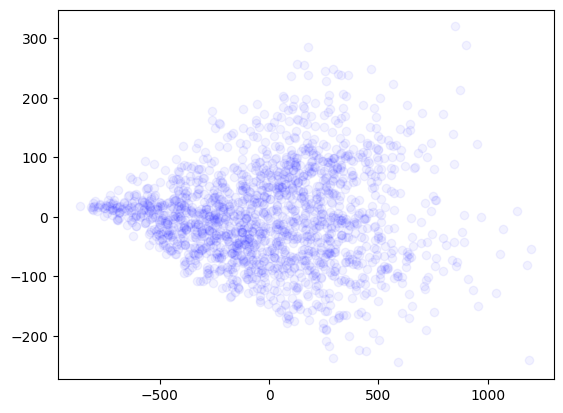

In [30]:
pca = PCA()
principalComponents = pca.fit_transform(reindex_intersection.T)
principalDf = pd.DataFrame(data = principalComponents)
plt.scatter(principalDf[[0]], principalDf[[1]], c='blue', alpha=0.05)
plt.show()

### Scaling

In [2]:
file_list = glob.glob("../PTP1B_DK/mtzs_reindex/PTP1B*mtz")
file_list.sort()

In [3]:
scaler = Scaler(file_list[0])

In [9]:
metrics = scaler.batch_scaling(file_list, outputmtz_path="../PTP1B_DK/scaled_reindexed_mtzs/", verbose=False)

./src/scaling.py:73: RuntimeWarning: overflow encountered in exp
  FB_scaled = np.exp(ln_k) * np.exp(-args) * FB
./src/scaling.py:73: RuntimeWarning: invalid value encountered in multiply
  FB_scaled = np.exp(ln_k) * np.exp(-args) * FB


In [13]:
metrics_df = pd.read_pickle("../PTP1B_DK/scaled_reindexed_mtzs/metrics.pkl")

In [14]:
metrics_df.columns=['file', 'start_LS', 'start_corr', 'end_LS', 'end_corr']

In [16]:
metrics_df[metrics_df['end_corr'] < 0.6]

,file,start_LS,start_corr,end_LS,end_corr
68,PTP1B-y0083_mrflagsref_idxs,8422887.0,0.325743,2.761942e+06,0.325745
135,PTP1B-y0159_mrflagsref_idxs,6160191.5,0.301537,2.225838e+07,0.301538
138,PTP1B-y0162_mrflagsref_idxs,11175648.0,0.164069,2.686260e+07,0.164065
155,PTP1B-y0179_mrflagsref_idxs,5484949.0,0.276186,8.029204e+06,0.276193
159,PTP1B-y0183_mrflagsref_idxs,5839829.5,0.356896,2.907157e+06,0.356896
...,...,...,...,...,...
1469,PTP1B-y1705_mrflagsref_idxs,7379919.0,0.119105,3.661257e+06,0.119108
1472,PTP1B-y1709_mrflagsref_idxs,6804739.0,0.064735,1.679669e+07,0.064738
1484,PTP1B-y1724_mrflagsref_idxs,7509253.0,0.070118,4.987754e+06,0.070122
1634,PTP1B-y1912_mrflagsref_idxs,10582921.0,0.461782,8.650355e+06,0.461787


### VAE IO Generation

In [3]:
file_list = glob.glob("../PTP1B_DK/scaled_reindexed_mtzs/PTP1B*mtz")
file_list.sort()

In [28]:
find_intersection(file_list, '../PTP1B_DK/scaled_reindexed_mtzs/intersection.pkl')

100%|██████████| 1679/1679 [00:21<00:00, 79.02it/s]


In [29]:
find_union(file_list, '../PTP1B_DK/scaled_reindexed_mtzs/union.pkl')

100%|██████████| 1679/1679 [00:19<00:00, 87.80it/s]


In [4]:
generate_vae_io('../PTP1B_DK/scaled_reindexed_mtzs/intersection.pkl', '../PTP1B_DK/scaled_reindexed_mtzs/union.pkl', '../PTP1B_DK/vae')

(array([[-0.7249928 , -0.8236544 , -0.7895323 , ..., -1.0241277 ,
         -1.1253728 , -0.29189157],
        [-0.18619072,  0.09194469,  0.06998159, ...,  0.27387977,
          0.53417367,  0.09442704],
        [ 0.06811239, -0.2544263 , -0.3103778 , ...,  0.07920532,
         -0.57037175,  0.87561524],
        ...,
        [-0.10222854, -0.1701019 , -0.03882438, ..., -0.09937348,
         -0.47417167, -1.2704906 ],
        [ 2.128754  ,  0.67281973,  1.6422192 , ..., -1.9497045 ,
         -1.2573962 , -1.9934392 ],
        [ 0.8298202 , -0.12493651,  0.5859356 , ...,  0.41912904,
         -1.0859514 , -1.3911688 ]], dtype=float32),
 array([[        nan, -1.2332149 , -0.6649279 , ...,         nan,
                 nan,         nan],
        [-0.2585032 ,  0.15622513, -0.61990166, ...,         nan,
                 nan,         nan],
        [ 0.18574089,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan, -0.18456452,  0.0

### VAE Training

In [2]:
from tf_vae import *

2023-05-04 13:56:16.587722: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-04 13:56:16.587837: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
import numpy as np

In [4]:
vae_input = np.load('../PTP1B_DK/vae/vae_input.npy')
vae_output = np.load('../PTP1B_DK/vae/vae_output.npy')

In [6]:
from sklearn.decomposition import PCA

In [8]:
import matplotlib.pyplot as plt

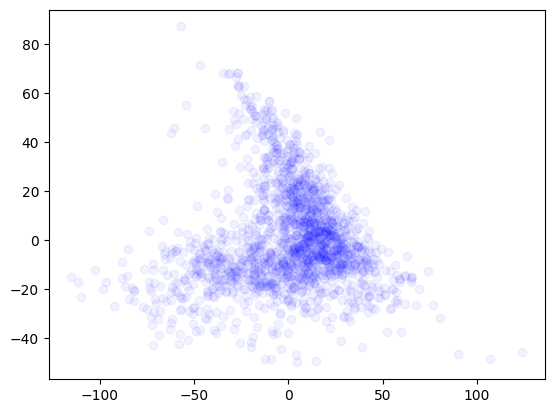

In [9]:
pca = PCA()
principalComponents = pca.fit_transform(vae_input)
principalDf = pd.DataFrame(data = principalComponents)
plt.scatter(principalDf[[0]], principalDf[[1]], c='blue', alpha=0.05)
plt.show()

In [6]:
vae = VAE(n_dim_i=vae_input.shape[1], n_dim_o = vae_output.shape[1], n_dim_latent=6, n_hidden_layers=[3, 6], n_hidden_size=100, activation="tanh")
vae.train(vae_input, vae_output, n_steps=4000, batchsize=100, lr=0.001, record_time=True, verbose=False)
loss_array = np.array(vae.loss_train)

2023-05-04 02:54:12.182976: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-05-04 02:54:12.227962: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:86:00.0 name: Tesla V100-PCIE-32GB computeCapability: 7.0
coreClock: 1.38GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2023-05-04 02:54:12.228008: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-05-04 02:54:12.233416: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-05-04 02:54:12.233492: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-05-04 02:54:12.235777: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.

In [7]:
vae.save('../PTP1B_DK/vae/latent-dim-6.pkl')

### Reconstruction

In [18]:
vae = VAE.load('../PTP1B_DK/vae/latent-dim-6.pkl')

2023-05-04 05:29:35.594860: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-05-04 05:29:35.656848: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:86:00.0 name: Tesla V100-PCIE-32GB computeCapability: 7.0
coreClock: 1.38GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2023-05-04 05:29:35.656903: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-05-04 05:29:35.664017: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-05-04 05:29:35.664112: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-05-04 05:29:35.667810: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.

In [21]:
z_mean, z_log_var, z = vae.encoder(vae_input)
recons = vae.decoder(z)
recons = recons.numpy()
np.save('../PTP1B_DK/vae/recons_6', recons)

2023-05-04 05:30:11.275334: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-05-04 05:30:11.678402: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


In [22]:
file_list = glob.glob("../PTP1B_DK/scaled_reindexed_mtzs/PTP1B*mtz")
file_list.sort()

In [23]:
reconstruct('../PTP1B_DK/vae/recons_6.npy', '../PTP1B_DK/scaled_reindexed_mtzs/intersection.pkl', '../PTP1B_DK/scaled_reindexed_mtzs/union.pkl', 
            file_list, '../PTP1B_DK/vae', '../PTP1B_DK/vae/recons_6_mtzs')

100%|██████████| 1679/1679 [15:24<00:00,  1.82it/s]


#### Check Correlations

In [2]:
file_list = glob.glob("../PTP1B_DK/vae/recons_6_mtzs/PTP1B*mtz")
file_list.sort()

In [8]:
from scipy.stats import pearsonr

data = []

for file in tqdm(file_list):
        
    current = rs.read_mtz(file)
    
    result = {
        'sample': os.path.basename(file)
    }
    
    result['mse'] = np.mean((current['F-obs-scaled'] - current['F-obs-recons'])**2)
    result['corr'] = pearsonr(current['F-obs-scaled'], current['F-obs-recons'])[0]
    data.append(result)

100%|██████████| 1679/1679 [00:22<00:00, 73.57it/s]


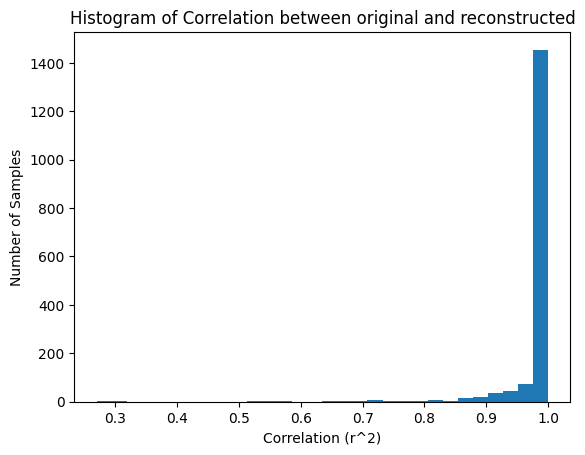

In [13]:
import matplotlib.pyplot as plt

plt.title("Histogram of Correlation between original and reconstructed")
plt.xlabel("Correlation (r^2)")
plt.ylabel("Number of Samples")
plt.hist(pd.DataFrame(data)['corr'], bins=30)
plt.show()

### Add Phases

In [16]:
file_list = glob.glob("../PTP1B_DK/vae/recons_6_mtzs/PTP1B*mtz")
file_list.sort()

In [17]:
import re

In [18]:
for file in tqdm(file_list):
        
    current = rs.read_mtz(file)
    
    match = re.match(r".*PTP1B-(y\d{4}).*", file)
    
    PTP1B_id = match.group(1)
    
    try:
        phases_file = glob.glob(f'../PTP1B_DK/pandda_input_models_refined_waters/*{PTP1B_id}*.mtz')[0]
    except:
        continue
        
    phases_df = rs.read_mtz(phases_file)
    
    current['refine_PH2FOFCWT'] = phases_df['PH2FOFCWT']
    current['refine_PHFOFCWT'] = phases_df['PHFOFCWT']
    
    current.write_mtz(os.path.dirname(file) + '_phases/' + os.path.basename(file))

100%|██████████| 1679/1679 [01:45<00:00, 15.88it/s]


### Blob Analysis

In [19]:
file_list = glob.glob("../PTP1B_DK/vae/recons_6_mtzs_phases/PTP1B*mtz")
file_list.sort()

In [21]:
generate_preprocess_diff_map_blobs(file_list, '../PTP1B_DK/pandda_input_models_refined_waters', 'F-obs-diff', 'refine_PH2FOFCWT', '../PTP1B_DK/vae/blob_stats_6', cutoff=3.5)

100%|██████████| 1624/1624 [06:44<00:00,  4.01it/s]


(       sample chain  seqid residue atom element     peakz     scorez  \
 0        0001     A    251     LEU    C       C  4.259366  61.517408   
 1        0001     A    251     LEU    O       O  4.259366  61.517408   
 2        0001     A    251     LEU    N       N  4.259366  61.517408   
 3        0001     A    254     ARG   CA       C  4.259366  61.517408   
 4        0001     A    255     LYS    N       N  4.259366  61.517408   
 ...       ...   ...    ...     ...  ...     ...       ...        ...   
 325723   1966     A     30     PHE  CD1       C  4.314431  48.079991   
 325724   1966     S     11     HOH    O       O  4.314431  48.079991   
 325725   1966     A    145     ILE  CG2       C  4.314431  48.079991   
 325726   1966     A     31     PRO   CG       C  4.314431  48.079991   
 325727   1966     A     31     PRO   CD       C  4.314431  48.079991   
 
             peak      score       cenx       ceny      cenz  coordx  coordy  \
 0       4.259366  61.517408 -11.082027  3

In [22]:
blob_df = pd.read_pickle('../PTP1B_DK/vae/blob_stats_6/blob_stats.pkl')

In [23]:
# BOUND SAMPLES

with open("../bound_sample_ids.txt") as f:
    bound_samples = set([line.strip() for line in f])

# Set the "bound" column based on whether or not each sample is in the bound samples list
blob_df["bound"] = blob_df["sample"].apply(lambda x: 1 if x in bound_samples else 0)

In [25]:
blob_df_cys_215_tag = tag_cys_215_blobs(blob_df, '../PTP1B_DK/pandda_input_models_refined_waters')

11316it [02:20, 80.40it/s]


In [26]:
blob_df_cys_215_tag['radius'] = blob_df_cys_215_tag['volume'].apply(lambda x: (x * 3/(4*np.pi))**(1/3))

In [27]:
blob_df_cys_215_lig_tag = tag_lig_blobs(blob_df_cys_215_tag, '../PTP1B_DK/all_bound_models_reindexed')

11316it [00:11, 982.87it/s] 


In [29]:
blob_df_cys_215_lig_tag.to_pickle('../PTP1B_DK/vae/blob_stats_6/blob_stats_tagged.pkl')

In [41]:
from sklearn import metrics
import matplotlib.pyplot as plt

hg_no_lig = ['0060', '1429', '1733', '1791', '0225', '0432', '0710']

def plot_roc_blob_stats(path, name=''):
    
    blob_stats_df = pd.read_pickle(path)
    
    # remove cysteines
    blob_stats_filtered = blob_stats_df[blob_stats_df['cys215']==0]    
    
    # remove samples where HG doesn't publish a ligand in the bound state
    blob_stats_filtered = blob_stats_filtered[~blob_stats_filtered['sample'].isin(hg_no_lig)]        
    
    # filter R factors
    r_factors = pd.read_csv('../PTP1B_DK/pandda_input_models_refined_waters/refine_stats.csv')[['data_id', 'Rfree_final']]
    high_r_factors = r_factors.loc[r_factors['Rfree_final'] > 0.4, 'data_id'].astype(str).str.zfill(4)
    blob_stats_filtered = blob_stats_filtered[~blob_stats_filtered['sample'].isin(high_r_factors)]
    
    # create ROC curve
    fpr, tpr, thresholds = metrics.roc_curve(blob_stats_filtered["ligand"], blob_stats_filtered["score"], pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name)
    display.plot()
    
    print("Total Number of Blobs:", len(blob_stats_filtered))
    print("Total Number of Unique Samples:", len(blob_stats_filtered.drop_duplicates(subset='sample')))
    
    plt.savefig(os.path.dirname(path) + '/roc_curve.pdf')
    blob_stats_filtered.to_pickle(os.path.dirname(path) + '/filtered_blob_stats_tagged.pkl')
    
    return blob_stats_filtered

Total Number of Blobs: 10050
Total Number of Unique Samples: 1504


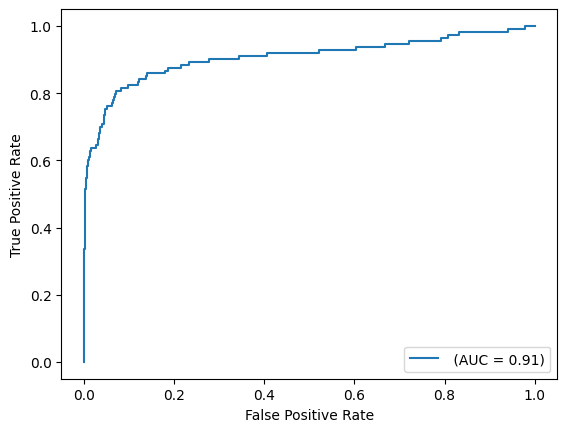

In [44]:
filtered = plot_roc_blob_stats('../PTP1B_DK/vae/blob_stats_6/blob_stats_tagged.pkl')

### Remove Blobs Close to Each Other

In [2]:
import pandas as pd

In [3]:
blobs_df = pd.read_pickle('../PTP1B_DK/vae/blob_stats_6/blob_stats_tagged.pkl')

In [4]:
# apply fractionalize function to blobs_df
blobs_df[['fractional', 'smallest_x_frac', 'smallest_x_cart']] = blobs_df.apply(determine_locations, args=('../PTP1B_DK/vae/recons_6_mtzs_phases',), axis=1)


In [5]:
blobs_df

,sample,peakz,peak,score,cenx,ceny,cenz,volume,radius,bound,cys215,ligand,fractional,smallest_x_frac,smallest_x_cart
0,0001,4.259366,4.259366,61.517408,-11.082027,36.314721,0.402368,16.310245,1.573224,0,0,0,"[0.11022343320583718, 0.46760666399323336, 0.0...","[0.11022343320583718, 0.4676066639932334, 0.00...","[-11.082027424063146, 36.31472074348405, 0.402..."
1,0001,4.021799,4.021799,48.110344,40.558690,3.598726,0.528509,12.956737,1.457032,0,0,0,"[0.4754548727680972, 0.046339014837837186, 0.0...","[0.04633901483783718, 0.4754548727680972, 0.99...","[-17.1627567021565, 36.92421913591899, 105.846..."
2,0002,4.863809,4.863808,710.902529,5.001769,46.439976,30.412528,184.446977,3.531243,0,1,0,"[0.35268054289899614, 0.5944645040047057, 0.28...","[0.24178396110570954, 0.6473194571010039, 0.95...","[-7.38568547812493, 50.56904106861582, 101.785..."
3,0002,4.400714,4.400713,94.056749,1.289913,51.651995,2.741077,24.558821,1.803182,0,0,0,"[0.34489065120826223, 0.6611820284169256, 0.02...","[0.31629137720866346, 0.6551093487917379, 0.69...","[-1.0160169860690438, 51.17759276362122, 74.11..."
4,0002,4.359015,4.359014,81.993119,11.704898,34.755441,30.359400,21.488968,1.724682,0,0,0,"[0.35220452776706446, 0.44489420516587036, 0.2...","[0.09268967739880589, 0.6477954722329355, 0.95...","[-20.856354144685394, 50.60622769801784, 101.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11311,1966,5.113978,5.113978,96.237517,10.073316,38.926534,18.853943,23.734881,1.782787,0,0,0,"[0.3634040922851935, 0.5018644995578783, 0.177...","[0.1384604072726848, 0.6365959077148065, 0.844...","[-16.10679018476712, 49.37681882671382, 89.563..."
11312,1966,5.012110,5.012110,73.771338,22.651822,36.661052,25.492097,18.238382,1.632924,0,0,0,"[0.48924322293772715, 0.4726565311063102, 0.24...","[0.016586691831417033, 0.5273434688936898, 0.4...","[-22.129677671765556, 40.902780881022764, 45.2..."
11313,1966,5.480166,5.480166,70.236508,1.962838,76.231070,9.770825,16.989178,1.594757,0,0,0,"[0.5133243286127659, 0.9828172055562511, 0.092...","[0.017182794443748928, 0.5305071230565148, 0.4...","[-22.217962112389824, 41.148166024934454, 45.1..."
11314,1966,4.384883,4.384883,62.797114,-0.781670,24.510741,29.685101,16.239655,1.570951,0,0,0,"[0.14927607669241594, 0.31600734853918755, 0.2...","[0.14927607669241594, 0.31600734853918755, 0.2...","[-0.7816698218047726, 24.51074128443813, 29.68..."
